In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score,r2_score,f1_score

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
data = pd.get_dummies(data,columns = ['sex','smoker','region'], drop_first =True)

In [5]:
print(data.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X= data.drop('charges',axis = 1)
y = data['charges']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42 )

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [11]:
r2_score(y_test,y_pred_lr)

0.7835929767120724

In [12]:
np.sqrt(mean_squared_error(y_test,y_pred_lr))

np.float64(5796.284659276273)

In [13]:
##Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
data1 = pd.read_csv("diabetes.csv")

In [16]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
X1= data1.drop('Outcome',axis = 1)
y1 = data1['Outcome']

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X1)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X_scaled,y1,test_size = 0.2,random_state = 42,stratify=y1)


In [22]:
knn = KNeighborsClassifier(n_neighbors = 5) ## value of k is 5 means it will check 5 nearest neighbor
knn.fit(X1_train,y1_train)
y1_pred_knn = knn.predict(X1_test)

In [23]:
accuracy_score(y1_test,y1_pred_knn)

0.7077922077922078

In [24]:
from sklearn.metrics import classification_report

In [25]:
report_knn = classification_report(y1_test,y1_pred_knn,output_dict = True)
print(report_knn)

{'0': {'precision': 0.7619047619047619, 'recall': 0.8, 'f1-score': 0.7804878048780488, 'support': 100.0}, '1': {'precision': 0.5918367346938775, 'recall': 0.5370370370370371, 'f1-score': 0.5631067961165048, 'support': 54.0}, 'accuracy': 0.7077922077922078, 'macro avg': {'precision': 0.6768707482993197, 'recall': 0.6685185185185185, 'f1-score': 0.6717973004972768, 'support': 154.0}, 'weighted avg': {'precision': 0.7022705185970491, 'recall': 0.7077922077922078, 'f1-score': 0.7042632953123126, 'support': 154.0}}


In [26]:
# Decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X1_train, y1_train)

y1_pred_dt = dt.predict(X1_test)


print("Decision Tree:")
print("Accuracy:", accuracy_score(y1_test, y1_pred_dt))
report_dt = classification_report(y1_test, y1_pred_dt,output_dict = True)
print(report_dt)

Decision Tree:
Accuracy: 0.7207792207792207
{'0': {'precision': 0.7522123893805309, 'recall': 0.85, 'f1-score': 0.7981220657276995, 'support': 100.0}, '1': {'precision': 0.6341463414634146, 'recall': 0.48148148148148145, 'f1-score': 0.5473684210526316, 'support': 54.0}, 'accuracy': 0.7207792207792207, 'macro avg': {'precision': 0.6931793654219728, 'recall': 0.6657407407407407, 'f1-score': 0.6727452433901655, 'support': 154.0}, 'weighted avg': {'precision': 0.710812606344659, 'recall': 0.7207792207792207, 'f1-score': 0.710195463049429, 'support': 154.0}}


In [28]:
## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

# Train the model
nb = GaussianNB()
nb.fit(X1_train, y1_train)

# Predict
y1_pred_nb = nb.predict(X1_test)

# Evaluate
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y1_test, y1_pred_nb))
report_nb = classification_report(y1_test, y1_pred_nb,output_dict = True)
print(report_nb)

Naive Bayes:
Accuracy: 0.7077922077922078
{'0': {'precision': 0.7956989247311828, 'recall': 0.74, 'f1-score': 0.7668393782383419, 'support': 100.0}, '1': {'precision': 0.5737704918032787, 'recall': 0.6481481481481481, 'f1-score': 0.6086956521739131, 'support': 54.0}, 'accuracy': 0.7077922077922078, 'macro avg': {'precision': 0.6847347082672307, 'recall': 0.6940740740740741, 'f1-score': 0.6877675152061276, 'support': 154.0}, 'weighted avg': {'precision': 0.7178798638343852, 'recall': 0.7077922077922078, 'f1-score': 0.7113863833845812, 'support': 154.0}}


In [30]:
#comparison

In [31]:
models = ['Decision Tree', 'KNN', 'Naive Bayes']
accuracies = [
    accuracy_score(y1_test, y1_pred_dt),
    accuracy_score(y1_test, y1_pred_knn),
    accuracy_score(y1_test, y1_pred_nb)
]

# Print comparison
for i in range(len(models)):
    print(f"{models[i]} -> Accuracy: {accuracies[i]:.3f}")

Decision Tree -> Accuracy: 0.721
KNN -> Accuracy: 0.708
Naive Bayes -> Accuracy: 0.708


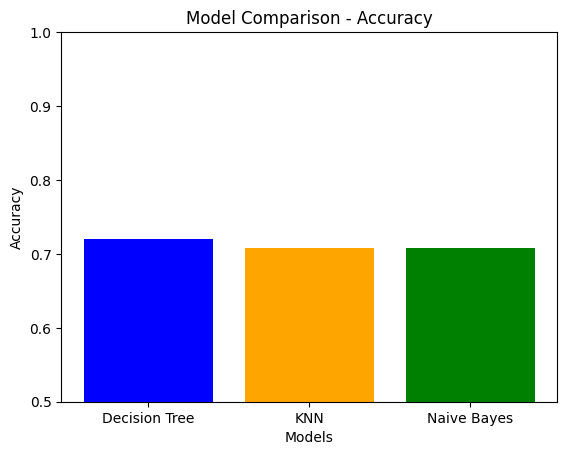

In [32]:
import matplotlib.pyplot as plt

# Bar chart for accuracy comparison
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.show()

In [33]:
metrics = {
    "Model": ["Decision Tree", "KNN", "Naive Bayes"],
    "Precision": [report_dt['weighted avg']['precision'], report_knn['weighted avg']['precision'], report_nb['weighted avg']['precision']],
    "Recall": [report_dt['weighted avg']['recall'], report_knn['weighted avg']['recall'], report_nb['weighted avg']['recall']],
    "F1-Score": [report_dt['weighted avg']['f1-score'], report_knn['weighted avg']['f1-score'], report_nb['weighted avg']['f1-score']],
}

In [34]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

           Model  Precision    Recall  F1-Score
0  Decision Tree   0.710813  0.720779  0.710195
1            KNN   0.702271  0.707792  0.704263
2    Naive Bayes   0.717880  0.707792  0.711386


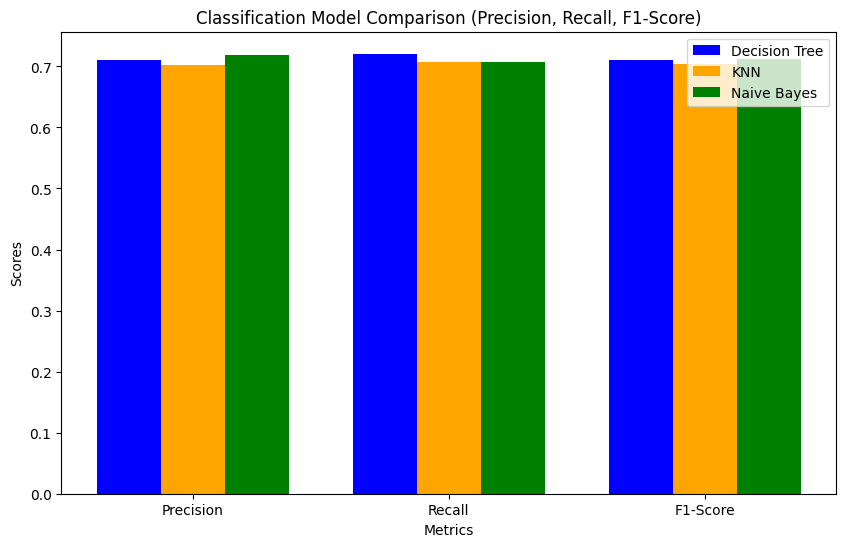

In [36]:
plt.figure(figsize =(10,6))
metrics = ["Precision", "Recall", "F1-Score"]
x = np.arange(len(metrics)) ## [0,1,2]
bar_width = 0.25
plt.bar(x - bar_width, metrics_df.loc[0, metrics], width=bar_width, label="Decision Tree", color="blue")
plt.bar(x, metrics_df.loc[1, metrics], width=bar_width, label="KNN", color="orange")
plt.bar(x + bar_width, metrics_df.loc[2, metrics], width=bar_width, label="Naive Bayes", color="green")

# Customize chart
plt.title("Classification Model Comparison (Precision, Recall, F1-Score)")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.xticks(x, metrics)
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend()

# Show the plot
plt.show()